In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv(r"C:\Users\91944\Downloads\titanic.csv")

In [108]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,PassengerId,Survived,Pclass,Age,Fare,Gender_male,PassengerId,Survived,Pclass,Age,Fare,Gender_male
0,1,0,3,22.0,7.2500,1,0,3,22.0,7.2500,True,1,0,3,22.0,7.2500,True
1,2,1,1,38.0,71.2833,2,1,1,38.0,71.2833,False,2,1,1,38.0,71.2833,False
2,3,1,3,26.0,7.9250,3,1,3,26.0,7.9250,False,3,1,3,26.0,7.9250,False
3,4,1,1,35.0,53.1000,4,1,1,35.0,53.1000,False,4,1,1,35.0,53.1000,False
4,5,0,3,35.0,8.0500,5,0,3,35.0,8.0500,True,5,0,3,35.0,8.0500,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
missing_values=df.isnull().sum()

In [9]:
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
columns_to_drop=['Embarked', 'Parch', 'SibSp', 'Name', 'Ticket', 'Cabin']

In [12]:
df.drop(columns=columns_to_drop, inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
dtype: int64

In [16]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
dtype: object

In [18]:
df.shape

(891, 6)

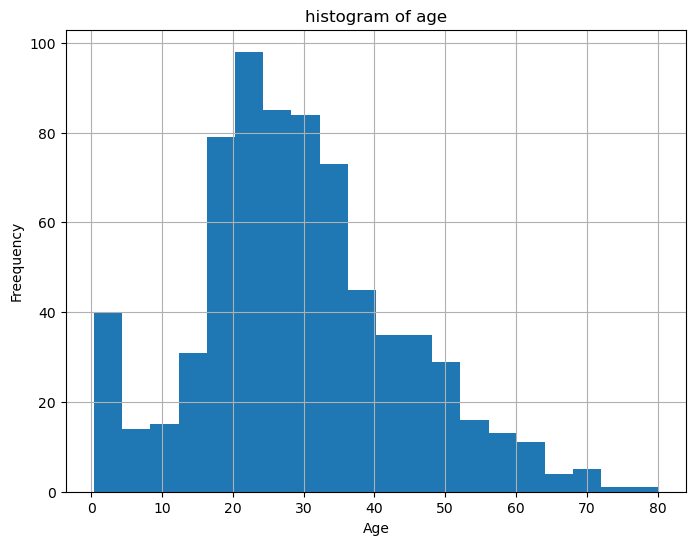

In [21]:
plt.figure(figsize=(8,6))
plt.hist(df['Age'],bins=20)
plt.title('histogram of age')
plt.xlabel('Age')
plt.ylabel('Freequency')
plt.grid(True)
plt.show()

In [22]:
median_age=df['Age'].median()

In [23]:
df['Age'].fillna(median_age, inplace=True)

In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
dtype: int64

In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
dtype: object

In [29]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [52]:
dummies_removing=pd.get_dummies(df,columns=['Sex'], drop_first=True, prefix='Gender')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\91944\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\91944\AppData\Local\Temp\ipykernel_26556\442688862.py", line 1, in <module>
    dummies_removing=pd.get_dummies(df,columns=['Sex'], drop_first=True, prefix='Gender')
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91944\.anaconda\Anaconda_new\Lib\site-packages\pandas\core\reshape\encoding.py", line 158, in get_dummies
    data_to_encode = data[columns]
                     ~~~~^^^^^^^^^
  File "C:\Users\91944\.anaconda\Anaconda_new\Lib\site-packages\pandas\core\frame.py", line 3767, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\91944\.anaconda\Anaconda_new\Lib\site-packages\pandas\core

In [40]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [53]:
dummies_removing        #true for male and #false for female

,PassengerId,Survived,Pclass,Age,Fare,Gender_male
0,1,0,3,22.0,7.2500,True
1,2,1,1,38.0,71.2833,False
2,3,1,3,26.0,7.9250,False
3,4,1,1,35.0,53.1000,False
4,5,0,3,35.0,8.0500,True
...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,True
887,888,1,1,19.0,30.0000,False
888,889,0,3,28.0,23.4500,False
889,890,1,1,26.0,30.0000,True


In [54]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,PassengerId,Survived,Pclass,Age,Fare,Gender_male,PassengerId,Survived,Pclass,Age,Fare,Gender_male
0,1,0,3,22.0,7.2500,1,0,3,22.0,7.2500,True,1,0,3,22.0,7.2500,True
1,2,1,1,38.0,71.2833,2,1,1,38.0,71.2833,False,2,1,1,38.0,71.2833,False
2,3,1,3,26.0,7.9250,3,1,3,26.0,7.9250,False,3,1,3,26.0,7.9250,False
3,4,1,1,35.0,53.1000,4,1,1,35.0,53.1000,False,4,1,1,35.0,53.1000,False
4,5,0,3,35.0,8.0500,5,0,3,35.0,8.0500,True,5,0,3,35.0,8.0500,True


In [50]:
df=pd.concat([df,dummies_removing], axis=1)

In [47]:
df.drop('Sex', axis=1, inplace=True)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,PassengerId,Survived,Pclass,Age,Fare,Gender_male
0,1,0,3,22.0,7.2500,1,0,3,22.0,7.2500,True
1,2,1,1,38.0,71.2833,2,1,1,38.0,71.2833,False
2,3,1,3,26.0,7.9250,3,1,3,26.0,7.9250,False
3,4,1,1,35.0,53.1000,4,1,1,35.0,53.1000,False
4,5,0,3,35.0,8.0500,5,0,3,35.0,8.0500,True


In [58]:
# Ensure that 'Sex' column is present before generating dummy variables
if 'Sex' in df.columns:
    # Generate dummy variables with custom column names ('Gender_male')
    dummies_removing = pd.get_dummies(df, columns=['Gender_male'], drop_first=True, prefix='Gender')

    # Drop the original 'Sex' column since it's no longer needed
    df.drop('Gender_male', axis=1, inplace=True)

    # Concatenate the original DataFrame with the DataFrame containing the dummy variables
    df = pd.concat([df, dummies_removing], axis=1)

    # Display the updated DataFrame
    print(df.head())
else:
    print("The 'Sex' column is not found in the DataFrame.")


The 'Sex' column is not found in the DataFrame.


In [59]:
df.head()

,PassengerId,Survived,Pclass,Age,Fare,PassengerId,Survived,Pclass,Age,Fare,Gender_male,PassengerId,Survived,Pclass,Age,Fare,Gender_male
0,1,0,3,22.0,7.2500,1,0,3,22.0,7.2500,True,1,0,3,22.0,7.2500,True
1,2,1,1,38.0,71.2833,2,1,1,38.0,71.2833,False,2,1,1,38.0,71.2833,False
2,3,1,3,26.0,7.9250,3,1,3,26.0,7.9250,False,3,1,3,26.0,7.9250,False
3,4,1,1,35.0,53.1000,4,1,1,35.0,53.1000,False,4,1,1,35.0,53.1000,False
4,5,0,3,35.0,8.0500,5,0,3,35.0,8.0500,True,5,0,3,35.0,8.0500,True


In [60]:
# Create a copy of the original DataFrame
new_df = df.copy()

# Remove the 'Sex' column from the new DataFrame
if 'Sex' in new_df.columns:
    new_df.drop('Sex', axis=1, inplace=True)

# Display the first few rows of the new DataFrame
print(new_df.head())


   PassengerId  Survived  Pclass   Age     Fare  PassengerId  Survived  \
0            1         0       3  22.0   7.2500            1         0   
1            2         1       1  38.0  71.2833            2         1   
2            3         1       3  26.0   7.9250            3         1   
3            4         1       1  35.0  53.1000            4         1   
4            5         0       3  35.0   8.0500            5         0   

   Pclass   Age     Fare  Gender_male  PassengerId  Survived  Pclass   Age  \
0       3  22.0   7.2500         True            1         0       3  22.0   
1       1  38.0  71.2833        False            2         1       1  38.0   
2       3  26.0   7.9250        False            3         1       3  26.0   
3       1  35.0  53.1000        False            4         1       1  35.0   
4       3  35.0   8.0500         True            5         0       3  35.0   

      Fare  Gender_male  
0   7.2500         True  
1  71.2833        False  
2   7.92

In [61]:
# Remove duplicate columns from the DataFrame
new_df = new_df.loc[:, ~new_df.columns.duplicated()]

# Display the first few rows of the updated DataFrame
print(new_df.head())


   PassengerId  Survived  Pclass   Age     Fare  Gender_male
0            1         0       3  22.0   7.2500         True
1            2         1       1  38.0  71.2833        False
2            3         1       3  26.0   7.9250        False
3            4         1       1  35.0  53.1000        False
4            5         0       3  35.0   8.0500         True


In [63]:
X = new_df.drop('Survived', axis=1)  # Drop 'Survived' column to get feature variables
y = new_df['Survived'] 

In [106]:
new_df

,PassengerId,Survived,Pclass,Age,Fare,Gender_male
0,1,0,3,22.0,7.2500,True
1,2,1,1,38.0,71.2833,False
2,3,1,3,26.0,7.9250,False
3,4,1,1,35.0,53.1000,False
4,5,0,3,35.0,8.0500,True
...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,True
887,888,1,1,19.0,30.0000,False
888,889,0,3,28.0,23.4500,False
889,890,1,1,26.0,30.0000,True


In [64]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
from sklearn.metrics import mean_squared_error


In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [75]:
model = DecisionTreeClassifier(random_state=42)

In [76]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
y_predict=model.predict(X_test)

In [78]:
y_predict

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [82]:
# Make predictions for a single row
row_to_predict = X_test.iloc[[0]]  # Assuming X_test is your feature matrix
yprediction = model.predict(row_to_predict)

# Print the prediction
print("Prediction:", yprediction)


Prediction: [0]


In [83]:
row_to_predict

,PassengerId,Pclass,Age,Fare,Gender_male
709,710,3,28.0,15.2458,True


In [85]:
yprediction=model.predict(row_to_predict)

In [86]:
row_to_predict = X_test.iloc[[0]]  # Assuming X_test is your feature matrix
yprediction = model.predict(row_to_predict)

# Print the prediction
print("Prediction:", yprediction)

Prediction: [0]


In [92]:
lets_find=X_test.iloc[[2]]
finding_row_2=model.predict(lets_find)

In [93]:
finding_row_2

array([1], dtype=int64)

In [94]:
import seaborn as sns

In [95]:
sns.set(style='whitegrid')

In [98]:
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
Fare           float64
PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
Fare           float64
Gender_male       bool
PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
Fare           float64
Gender_male       bool
dtype: object


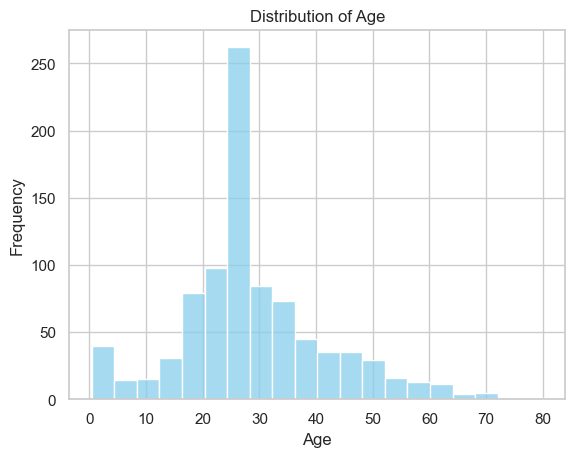

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histogram for Age column
sns.histplot(data=new_df, x='Age', bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [102]:
new_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
Fare           float64
Gender_male       bool
dtype: object

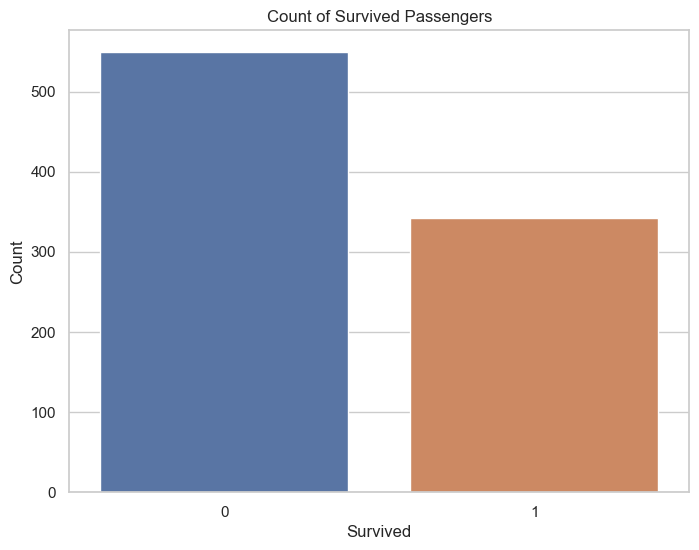

In [103]:
plt.figure(figsize=(8, 6))
sns.countplot(data=new_df, x='Survived')
plt.title('Count of Survived Passengers')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

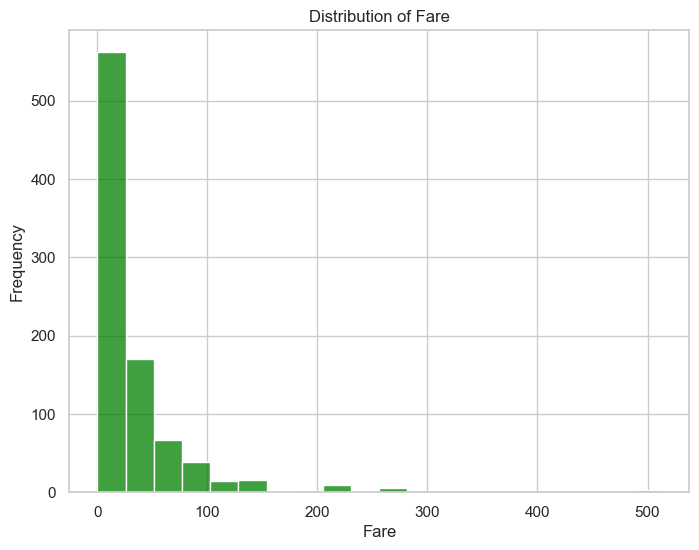

In [105]:
plt.figure(figsize=(8, 6))
sns.histplot(data=new_df, x='Fare', bins=20, color='green')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [109]:
from joblib import dump

In [110]:
dump(model,'titanic_file.joblib')

['titanic_file.joblib']

In [115]:
from joblib import load
loaded_model=load('titanic_file.joblib')